In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from datasets import load_dataset

dataset = load_dataset("naklecha/minecraft-question-answer-700k")

Generating train split: 0 examples [00:00, ? examples/s]

In [2]:
df = dataset['train'].to_pandas()
print(len(df))
df = df.drop('source', axis=1)
filtered_df = df[df['question'].str.contains("\?")]
print(len(filtered_df))
filtered_df = filtered_df[filtered_df['answer'] != '']
print(len(filtered_df))
def filter_row(row, max_words=50):
    return len(str(row['question']).split()) <= max_words and len(str(row['answer']).split()) <= max_words and len(str(row['question']).split()) > 1 and len(str(row['answer']).split()) > 1

# Apply custom function to filter rows
filtered_df = filtered_df[filtered_df.apply(filter_row, axis=1)]

# Display the filtered DataFrame
print(len(filtered_df))
questions = filtered_df['question'].to_list()
answers = filtered_df['answer'].to_list()

694814
666869
666549
471115


In [5]:
x = len(filtered_df)
question_counts = {}
answer_counts = {}
for w in range(0,x):
    t = len(str(questions[w]).split())
    y = len(str(answers[w]).split())
    try:
        question_counts[t]+=1
    except KeyError:
        question_counts[t]=1
    try:
        answer_counts[y]+=1
    except KeyError:
        answer_counts[y]=1
print(max(answer_counts.keys()))
max_key = max(question_counts.keys())
print(max_key)

50
50


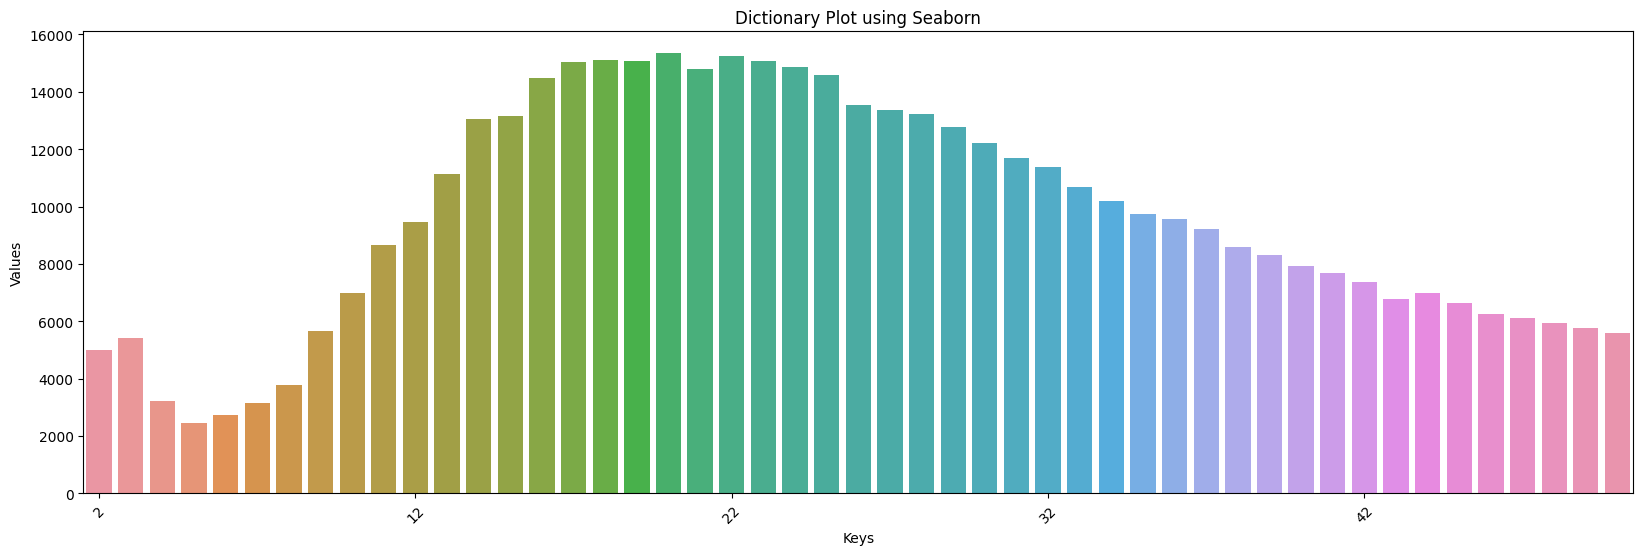

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Convert dictionary to DataFrame
import pandas as pd
questiondf = pd.DataFrame(list(question_counts.items()), columns=['Keys', 'Values'])
answerdf = pd.DataFrame(list(answer_counts.items()), columns=['Keys', 'Values'])
# Plot using Seaborn
plt.figure(figsize=(20, 6))
sns.barplot(x='Keys', y='Values', data=answerdf)
plt.title('Dictionary Plot using Seaborn')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.show()

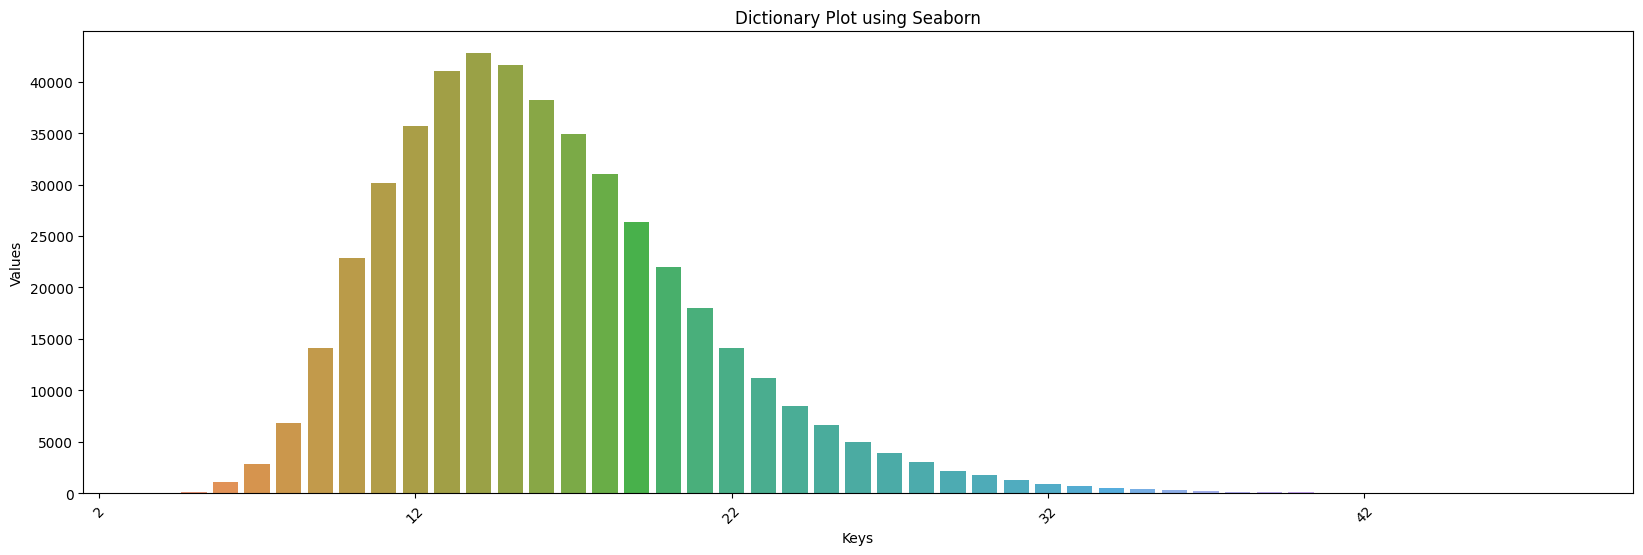

In [7]:
plt.close
plt.figure(figsize=(20, 6))
sns.barplot(x='Keys', y='Values', data=questiondf)
plt.title('Dictionary Plot using Seaborn')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.show()